In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
# Load datasets
customers_data = pd.read_csv("/Users/narasimha/Downloads/zeotap intern/Customers.csv")
products_data = pd.read_csv("/Users/narasimha/Downloads/zeotap intern/Products.csv")
transactions_data = pd.read_csv("/Users/narasimha/Downloads/zeotap intern/Transactions.csv")

**Task 1: EDA and Business Insights**

In [147]:
# Convert TransactionDate to datetime
transactions_data['TransactionDate'] = pd.to_datetime(transactions_data['TransactionDate'])


customers_data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [148]:
products_data.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [149]:
transactions_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [150]:
# 1. Summary statistics
print("Customers Data Overview:")
print(customers_data.describe(include='all'))
print("\nProducts Data Overview:")
print(products_data.describe(include='all'))
print("\nTransactions Data Overview:")
print(transactions_data.describe(include='all'))

Customers Data Overview:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Data Overview:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN         

In [151]:
# 2. Missing Data Analysis
missing_customers = customers_data.isnull().sum()
missing_products = products_data.isnull().sum()
missing_transactions = transactions_data.isnull().sum()
print("\nMissing Data Analysis:")
print("Customers:", missing_customers)
print("Products:", missing_products)
print("Transactions:", missing_transactions)


Missing Data Analysis:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64



Top-Selling Products:
           ProductName  Quantity
0      SoundWave Jeans        46
1   SoundWave Cookbook        46
2   TechPro Headphones        45
3       ActiveWear Rug        43
4  HomeSense Desk Lamp        43


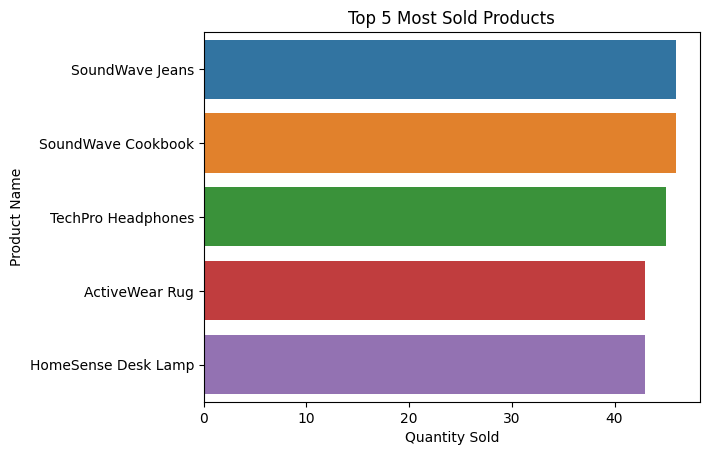

In [152]:
# 3. Top-selling products by quantity
top_products = (
    transactions_data.groupby('ProductID')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
    .merge(products_data, on='ProductID', how='left')[['ProductName', 'Quantity']]
)
print("\nTop-Selling Products:")
print(top_products)

# Plot top-selling products
sns.barplot(data=top_products, x='Quantity', y='ProductName', hue='ProductName')
plt.title('Top 5 Most Sold Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()


Revenue by Category:
      Category  TotalValue
0        Books   192147.47
1     Clothing   166170.66
2  Electronics   180783.50
3   Home Decor   150893.93


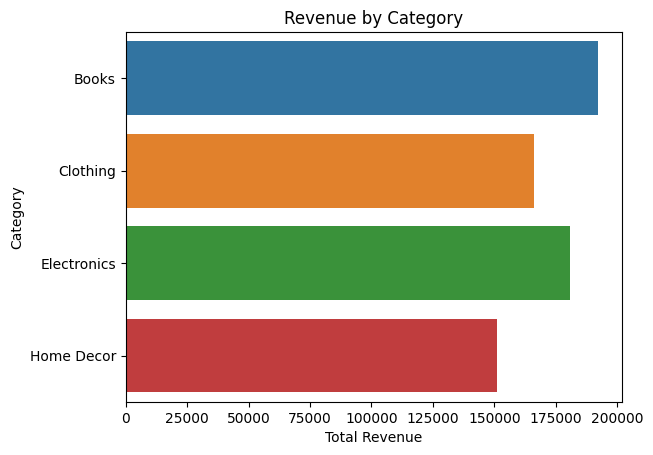

In [153]:
# 4. Revenue by category
revenue_by_category = (
    transactions_data.merge(products_data, on='ProductID', how='left')
    .groupby('Category')['TotalValue']
    .sum()
    .reset_index()
)
print("\nRevenue by Category:")
print(revenue_by_category)

# Plot revenue by category
sns.barplot(data=revenue_by_category, x='TotalValue', y='Category', hue='Category')
plt.title('Revenue by Category')
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.show()

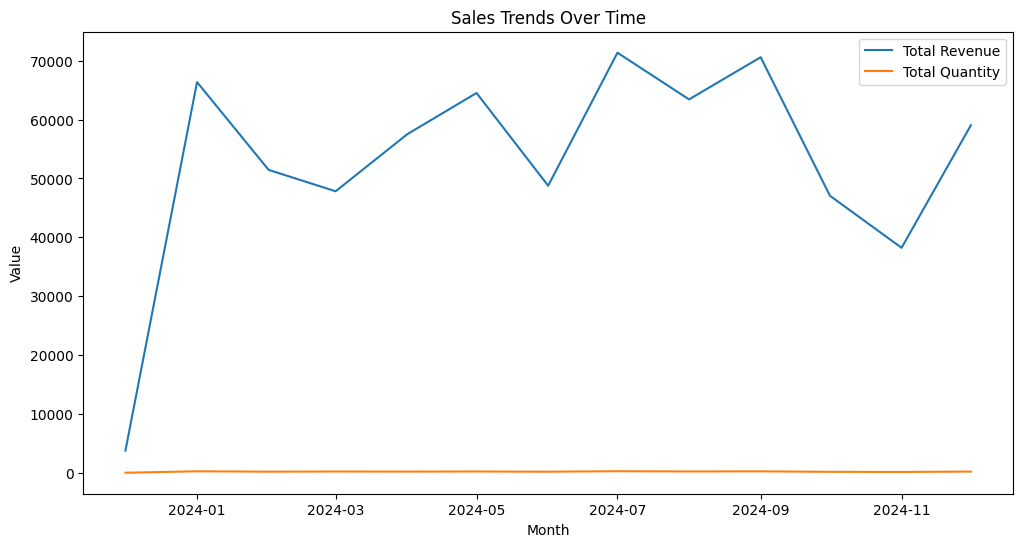

In [154]:
# 5. Sales Trends Over Time
sales_over_time = transactions_data.groupby(transactions_data['TransactionDate'].dt.to_period('M')).agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()
sales_over_time['TransactionDate'] = sales_over_time['TransactionDate'].dt.to_timestamp()

# Plot sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='TransactionDate', y='TotalValue', label='Total Revenue')
sns.lineplot(data=sales_over_time, x='TransactionDate', y='Quantity', label='Total Quantity')
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()

In [155]:
# 6. Customer Analysis
active_customers = transactions_data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum'
}).sort_values(by='TotalValue', ascending=False).head(5)
print("\nTop 5 Active Customers:")
print(active_customers)



Top 5 Active Customers:
            TransactionID  TotalValue
CustomerID                           
C0141                  10    10673.87
C0054                   8     8040.39
C0065                  10     7663.70
C0156                  11     7634.45
C0082                   7     7572.91



Correlation Matrix:
            Quantity  TotalValue     Price
Quantity    1.000000    0.609972 -0.009378
TotalValue  0.609972    1.000000  0.722714
Price      -0.009378    0.722714  1.000000


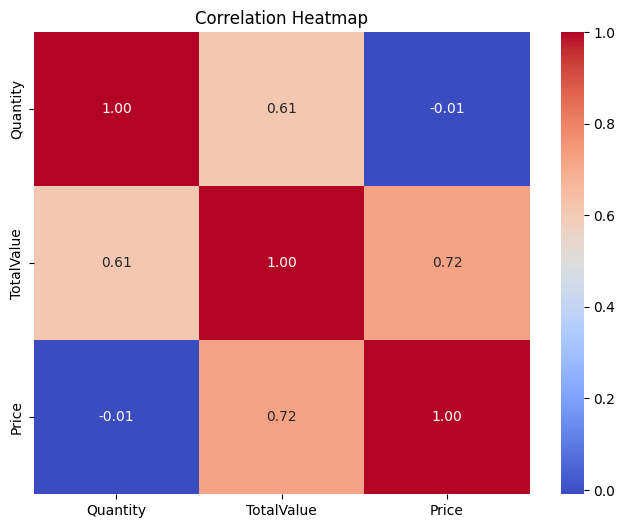

In [156]:

# 7. Correlation Analysis
numerical_columns = transactions_data[['Quantity', 'TotalValue', 'Price']]
correlation_matrix = numerical_columns.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()